In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [114]:
data=pd.read_csv('../data/clean_data.csv')
data.head()
# Observamos que las variables categóricas son de las columnas 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating' y 'Own Your Home'.
# Estas variables categóricas las tenemos que pasar a numéricas.

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [115]:
#Eliminamos las columnas que no nos sirvan
data.drop(columns=['Customer Number'], inplace=True)
data.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [116]:
data['Offer Accepted'].unique()

array(['No', 'Yes'], dtype=object)

In [117]:
#Columna Offer Accepted
le = LabelEncoder().fit(data['Offer Accepted'])
data['Offer Accepted'] = le.transform(data['Offer Accepted'])
data['Offer Accepted'].unique()

array([0, 1])

In [118]:
data['Reward'].unique()

array(['Air Miles', 'Cash Back', 'Points'], dtype=object)

In [119]:
#Columna Reward
le = LabelEncoder().fit(data['Reward'])
data['Reward'] = le.transform(data['Reward'])
data['Reward'].unique()

array([0, 1, 2])

In [120]:
data['Mailer Type'].unique()

array(['Letter', 'Postcard'], dtype=object)

In [121]:
#Columna Mailer Type
le = LabelEncoder().fit(data['Mailer Type'])
data['Mailer Type'] = le.transform(data['Mailer Type'])
data['Mailer Type'].unique()

array([0, 1])

In [122]:
data['Income Level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [123]:
#Columna Mailer Type
le = LabelEncoder().fit(data['Income Level'])
data['Income Level'] = le.transform(data['Income Level'])
data['Income Level'].unique()

array([0, 2, 1])

In [124]:
data['Overdraft Protection'].unique()

array(['No', 'Yes'], dtype=object)

In [125]:
#Columna Overdraft Protection
le = LabelEncoder().fit(data['Overdraft Protection'])
data['Overdraft Protection'] = le.transform(data['Overdraft Protection'])
data['Overdraft Protection'].unique()

array([0, 1])

In [126]:
data['Credit Rating'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [127]:
#Columna Credit Rating
le = LabelEncoder().fit(data['Credit Rating'])
data['Credit Rating'] = le.transform(data['Credit Rating'])
data['Credit Rating'].unique()

array([0, 2, 1])

In [128]:
data['Own Your Home'].unique()

array(['No', 'Yes'], dtype=object)

In [129]:
#Columna Own Your Home
le = LabelEncoder().fit(data['Own Your Home'])
data['Own Your Home'] = le.transform(data['Own Your Home'])
data['Own Your Home'].unique()

array([0, 1])

<AxesSubplot:>

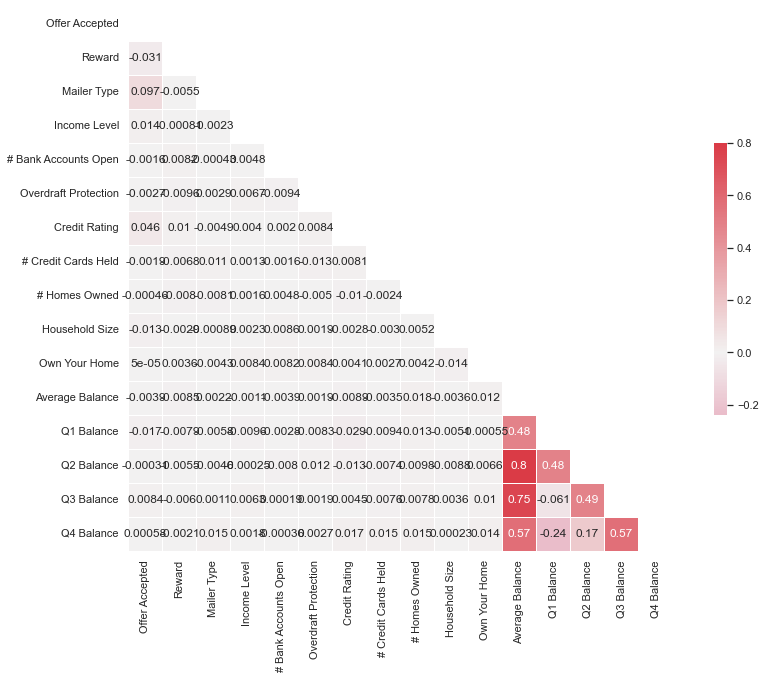

In [130]:
plt.figure(figsize=(15, 10))
sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data.corr(),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5})

In [131]:
credit_card_dummy = pd.get_dummies(data, drop_first = True)
credit_card_dummy.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,0,0,0,1,0,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0
1,0,0,0,2,1,0,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0
2,0,0,1,0,2,0,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0
3,0,0,0,2,2,0,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0
4,0,0,0,2,1,0,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0


In [132]:
X = credit_card_dummy.drop('Offer Accepted', axis = True)
y = credit_card_dummy['Offer Accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y)

#Seleccionamos 80% de los datos para training y 20% para testing

In [133]:
y_train.value_counts(normalize = True), y_test.value_counts(normalize = True)

(0    0.943185
 1    0.056815
 Name: Offer Accepted, dtype: float64,
 0    0.94327
 1    0.05673
 Name: Offer Accepted, dtype: float64)

In [134]:
lg = LogisticRegression(max_iter = 2000)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)

Accuracy lg: 0.9432703003337041


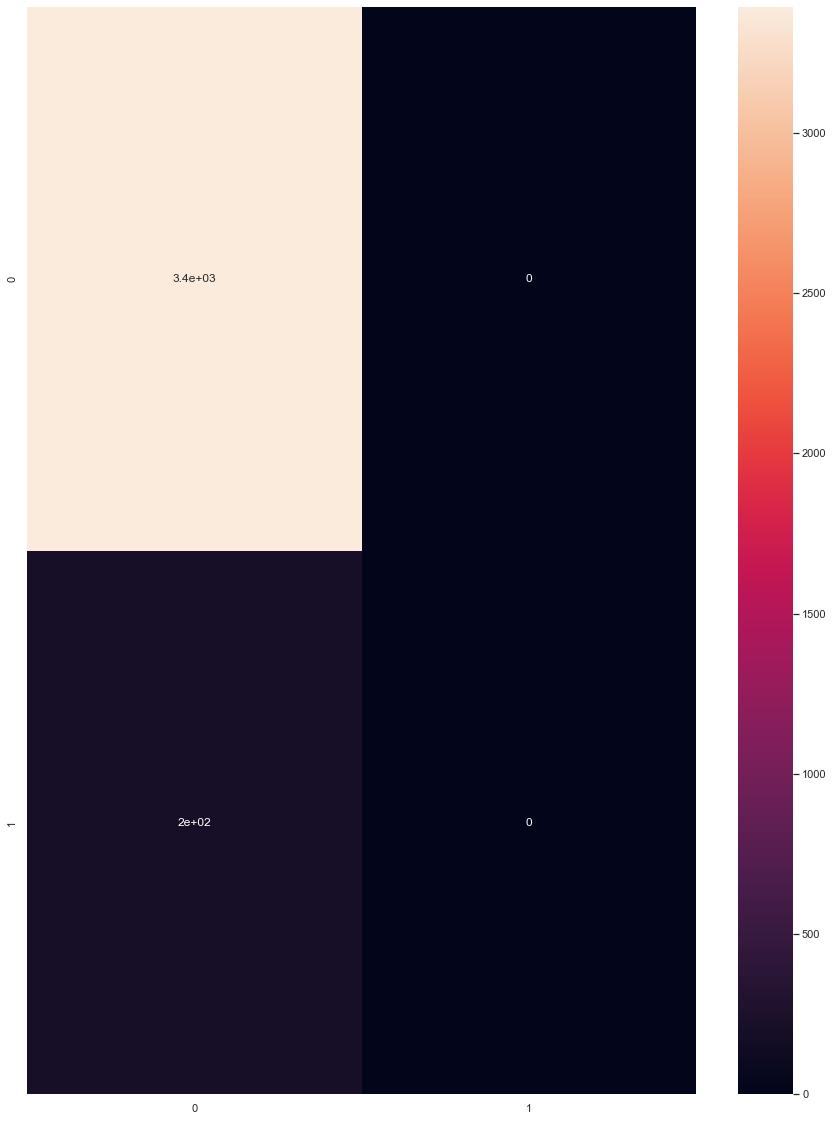

In [135]:
acc = accuracy_score(y_test, pred)
print(f'Accuracy lg: {acc}')

cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (15, 20))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# La precisión no es del todo mala porque está por encima de 0.9
# Sabemos que 0 es 'No' y 1 es 'Yes'
# No ha predecido ningun yes (False positive, True positive).
# Lo mejor que ha predecido es que no aceptaban la oferta y de verdad no la aceptaban (True negative).
# Algunas veces ha predecido que no cuando si (False negative).
# Como este modelo nunca predice que sí se acepta la oferta, no es rentable. Vamos a balancear los datos.
# Como la diferencia entre 'Yes' y 'No' es muy grande, vamos a hacer undersampling

In [136]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 225 kB 3.4 MB/s 
     |████████████████████████████████| 297 kB 37.6 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [137]:
from imblearn.under_sampling import RandomUnderSampler

In [139]:
rus=RandomUnderSampler()
X_train_rus, y_train_rus=rus.fit_resample(X_train, y_train)


In [140]:
X_train.shape, y_train.shape

((14380, 15), (14380,))

In [141]:
X_train_rus.shape, y_train_rus.shape

((1634, 15), (1634,))

Recall: 0.5294117647058824,
Precision: 0.08794788273615635,
f1: 0.15083798882681562


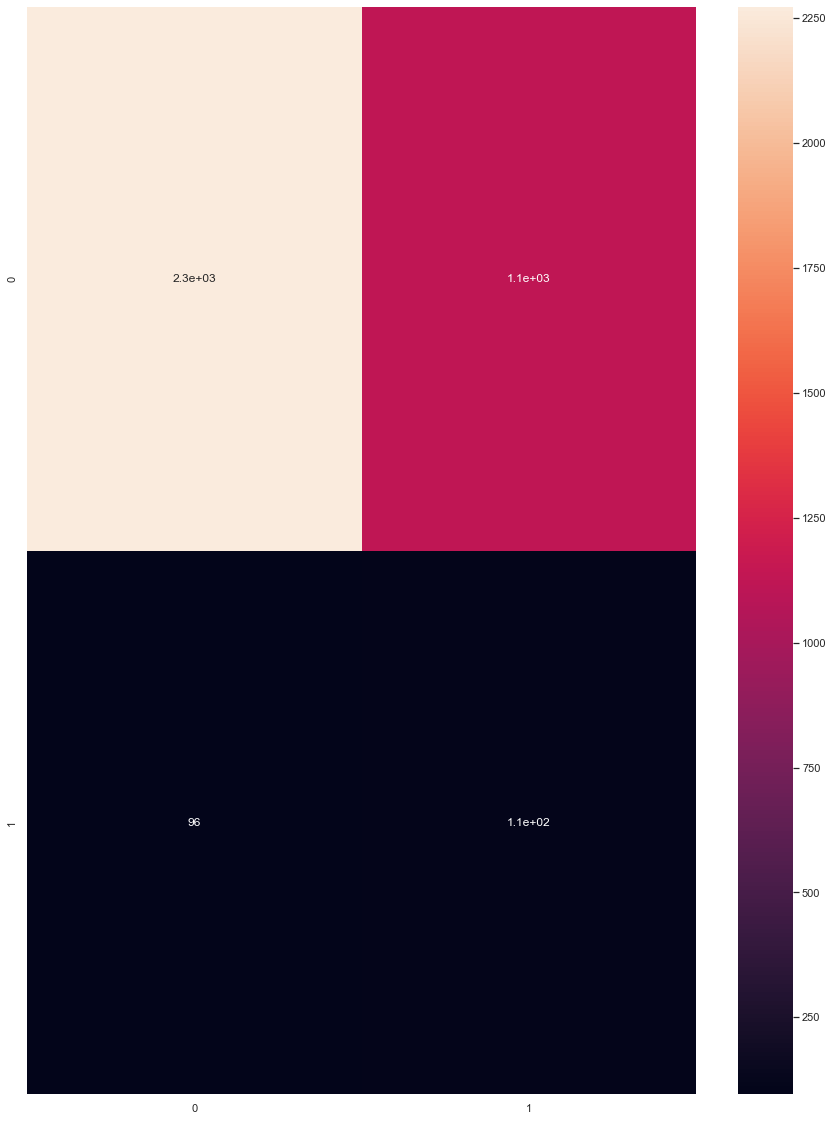

In [180]:
y_train_rus.value_counts(normalize = True), y_test.value_counts(normalize = True)

lg = LogisticRegression(max_iter = 2000)
lg.fit(X_train_rus, y_train_rus)
pred = lg.predict(X_test)

probas=lg.predict_proba(X_test)
preds=[1 if probas[i][1]>0.54 else 0 for i in range(len(probas))]
recall_proba = recall_score(y_test, preds)
precision_proba = precision_score(y_test, preds)
f1_score_proba = f1_score(y_test, preds)
print(f'Recall: {recall_proba},\nPrecision: {precision_proba},\nf1: {f1_score_proba}')

cm = confusion_matrix(y_test, preds)

plt.figure(figsize = (15, 20))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# Aquí nuestro modelo ha mejorado porque hay varias predicciones de 'Yes'. 
# Con este modelos SABEMOS a quién NO llamar.